### IMDb Scraper

Scrape IMDb for ratings of a series and plot it.

In [7]:
# Import necessary libraries
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# IMDb IDs

# Game of Thrones (8 Seasons)
imdbID = 'tt0944947'

# Breaking Bad (5 Seasons)
#imdbID = 'tt0903747'

# Rick and Morty (4 Seasons)
#imdbID = 'tt2861424'

# The Simpsons (30 Seasons)
#imdbID = 'tt0096697'

# Spongebob Squarepants (11 Seasons)
#imdbID = 'tt0206512'

# The Leftovers (3 Seasons)
#imdbID = 'tt2699128'

# Chernobyl (1 Season)
#imdbID = 'tt7366338'

# Brooklyn 99 (6 Seasons)
#imdbID = 'tt2467372'

# Friends (10 Seasons)
#imdbID = 'tt0108778'

# HIMYM (9 Seasons)
#imdbID = 'tt0460649'

# TAAHM (12 Seasons)
#imdbID = 'tt0369179'

# One Piece (1 Season)
#imdbID = 'tt0388629'

# Band of Brothers (1 Season)
#imdbID = 'tt0185906'

# Avatar (3 Seasons)
#imdbID = 'tt0417299'

# Black Mirror (5 Seasons)
#imdbID = 'tt2085059'

# Westworld (2 Seasons)
#imdbID = 'tt0475784'

# House of Cards (6 Seasons)
#imdbID = 'tt1856010'

# South Park (22 Seasons)
#imdbID = 'tt0121955'

# Dark (2 Seasons)
#imdbID = 'tt5753856'

# Big Little Lies (2 Seasons)
#imdbID = 'tt3920596'

# Mr. Robot (3 Seasons)
#imdbID = 'tt4158110'

# The Handmaid's Tale (3 Seasons)
#imdbID = 'tt5834204'

In [13]:
num_seasons = 3
season = range(1,num_seasons+1)
titles = []
ratings = []
s_data = []


for s in season: 
    url = 'https://www.imdb.com/title/{}/episodes?season={}'.format(imdbID, s)
    
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text)
    
    title_list = soup.find_all('a',{'itemprop':'name'})
    rating_list = soup.find_all('span',{'class':'ipl-rating-star__rating'})
    
    for x in title_list:
        titles.append(x.text)
        s_data.append(s)

    for x in rating_list:
        #print(x.text)
        if len(x.text)==3:
            ratings.append(float(x.text))
    
    

d = {'title':titles,'season':s_data,'rating':ratings}
df = pd.DataFrame(d)
df

,title,season,rating
0,Winter Is Coming,1,9.0
1,The Kingsroad,1,8.8
2,Lord Snow,1,8.7
3,"Cripples, Bastards, and Broken Things",1,8.8
4,The Wolf and the Lion,1,9.1
5,A Golden Crown,1,9.2
6,You Win or You Die,1,9.2
7,The Pointy End,1,9.0
8,Baelor,1,9.6
9,Fire and Blood,1,9.5


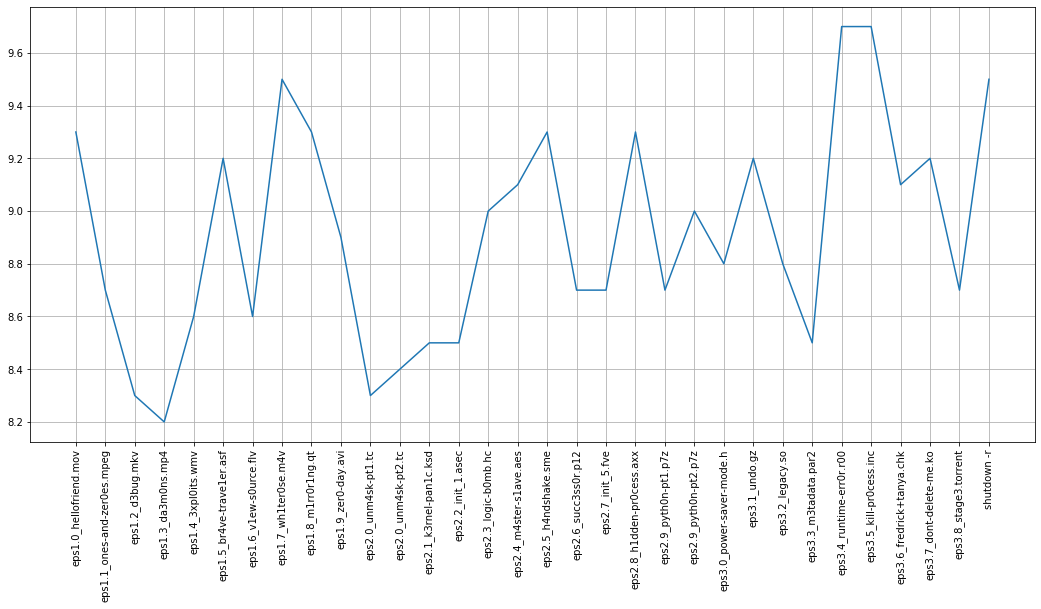

['eps1.0_hellofriend.mov', 'eps1.1_ones-and-zer0es.mpeg', 'eps1.2_d3bug.mkv', 'eps1.3_da3m0ns.mp4', 'eps1.4_3xpl0its.wmv', 'eps1.5_br4ve-trave1er.asf', 'eps1.6_v1ew-s0urce.flv', 'eps1.7_wh1ter0se.m4v', 'eps1.8_m1rr0r1ng.qt', 'eps1.9_zer0-day.avi', 'eps2.0_unm4sk-pt1.tc', 'eps2.0_unm4sk-pt2.tc', 'eps2.1_k3rnel-pan1c.ksd', 'eps2.2_init_1.asec', 'eps2.3_logic-b0mb.hc', 'eps2.4_m4ster-s1ave.aes', 'eps2.5_h4ndshake.sme', 'eps2.6_succ3ss0r.p12', 'eps2.7_init_5.fve', 'eps2.8_h1dden-pr0cess.axx', 'eps2.9_pyth0n-pt1.p7z', 'eps2.9_pyth0n-pt2.p7z', 'eps3.0_power-saver-mode.h', 'eps3.1_undo.gz', 'eps3.2_legacy.so', 'eps3.3_m3tadata.par2', 'eps3.4_runtime-err0r.r00', 'eps3.5_kill-pr0cess.inc', 'eps3.6_fredrick+tanya.chk', 'eps3.7_dont-delete-me.ko', 'eps3.8_stage3.torrent', 'shutdown -r']
[9.3, 8.7, 8.3, 8.2, 8.6, 9.2, 8.6, 9.5, 9.3, 8.9, 8.3, 8.4, 8.5, 8.5, 9.0, 9.1, 9.3, 8.7, 8.7, 9.3, 8.7, 9.0, 8.8, 9.2, 8.8, 8.5, 9.7, 9.7, 9.1, 9.2, 8.7, 9.5]


In [3]:
plt.figure(figsize=(18, 8))
plt.plot(titles,ratings)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.grid(True)
plt.show()

print(titles)
print(ratings)



In [5]:
imdbID = 'tt453749'
url = 'https://www.imdb.com/title/{}/episodes?season={}'.format(imdbID, s)
print(url)

https://www.imdb.com/title/tt453749/episodes?season=3
